In [73]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from plot_region import *

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
clr = SGDClassifier(max_iter=1000, tol=1e-3)#max_iter - макс. кол-во эпох, tol - критерий остановки. 
clr.fit(X_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
y_pred = clr.predict(X_test)
accuracy_score(y_test, y_pred)

0.3111111111111111

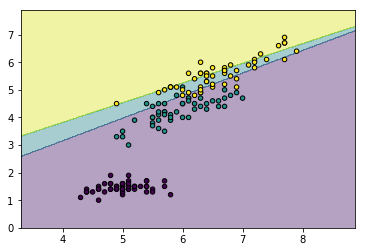

In [7]:
PlotResultRegion(clr, X, y, h = 0.02)

In [46]:
X2 = iris.data[:100, [0, 2]] #первые 100 записей - два линейно разделимых класса
y2 = iris.target[:100]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [47]:
clr2 = SGDClassifier(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)#max_iter - макс. кол-во эпох, 
#tol - критерий остановки. 
clr2.fit(X_train2, y_train2) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='hinge',
       max_iter=1000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
y_pred2 = clr2.predict(X_test2)
accuracy_score(y_test2, y_pred2)

1.0

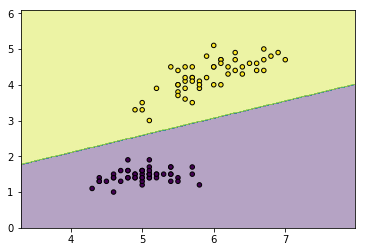

In [49]:
PlotResultRegion(clr2, X2, y2, h = 0.02)

In [50]:
clr3 = LinearSVC()#max_iter - макс. кол-во эпох, 
#tol - критерий остановки. 
clr3.fit(X_train2, y_train2) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

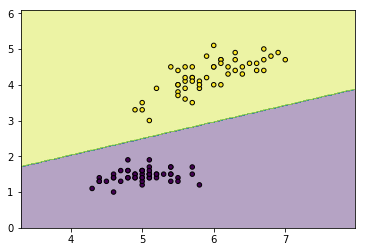

In [51]:
PlotResultRegion(clr3, X2, y2, h = 0.02)

In [52]:
scalar = StandardScaler()
X2_sc = scalar.fit_transform(X2)

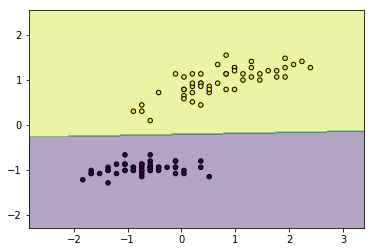

In [53]:
PlotResultRegion(clr4, X2_sc, y2, h = 0.02)

In [54]:
X3 = iris.data[50:150, [0, 2]] #первые 100 записей - два линейно разделимых класса
y3 = iris.target[50:150]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

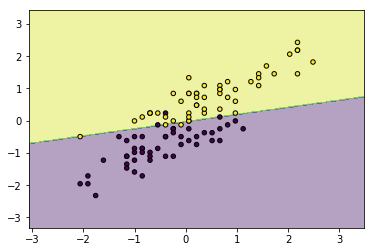

In [60]:
clr5 = LinearSVC()
scalar = StandardScaler()
X3_sc = scalar.fit_transform(X3)
clr5.fit(X3_sc, y3)
PlotResultRegion(clr5, X3_sc, y3, h = 0.02)

In [63]:
X3_train_sc = scalar.fit_transform(X_train3)
clr5.fit(X3_train_sc, y_train3)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
X3_test_sc = scalar.transform(X_test3)
y5 = clr5.predict(X3_test_sc)
accuracy_score(y_test3, y5)

0.95